To goal
[(18, 0), (17, 1), (16, 1), (15, 1), (14, 1), (13, 2), (12, 3), (12, 4), (11, 5), (10, 6), (10, 7), (10, 8), (10, 9), (9, 10), (8, 10), (7, 10), (6, 11), (5, 12), (4, 13), (3, 14), (2, 15), (1, 15), (0, 16), (0, 17), (0, 18), (0, 19)]
To alternate goal
[(18, 0), (17, 0), (16, 1), (15, 1), (14, 1), (13, 1), (12, 1), (11, 0), (10, 1), (9, 2), (8, 2), (7, 2), (6, 2), (5, 2), (4, 2), (3, 2), (2, 2), (1, 3), (1, 4), (2, 5), (3, 6), (2, 7), (1, 7)]
Fvalues
6733.851509405224
13493.844668565634
Altroute chosen
From altgoal to goal
[(1, 7), (2, 7), (3, 7), (4, 7), (5, 7), (6, 7), (7, 7), (8, 7), (9, 7), (10, 8), (10, 9), (9, 10), (8, 10), (7, 10), (6, 11), (5, 12), (4, 13), (3, 14), (2, 15), (1, 15), (0, 16), (0, 17), (0, 18), (0, 19)]
From goal to nextgoal
[(0, 19), (1, 19), (2, 19), (3, 19), (4, 19), (5, 18), (6, 18), (7, 17), (8, 16), (9, 15), (9, 14), (10, 13), (11, 12), (11, 11), (12, 10), (13, 11), (13, 12), (13, 13), (13, 14), (13, 15), (13, 16), (13, 17), (14, 18), (15, 17), (16

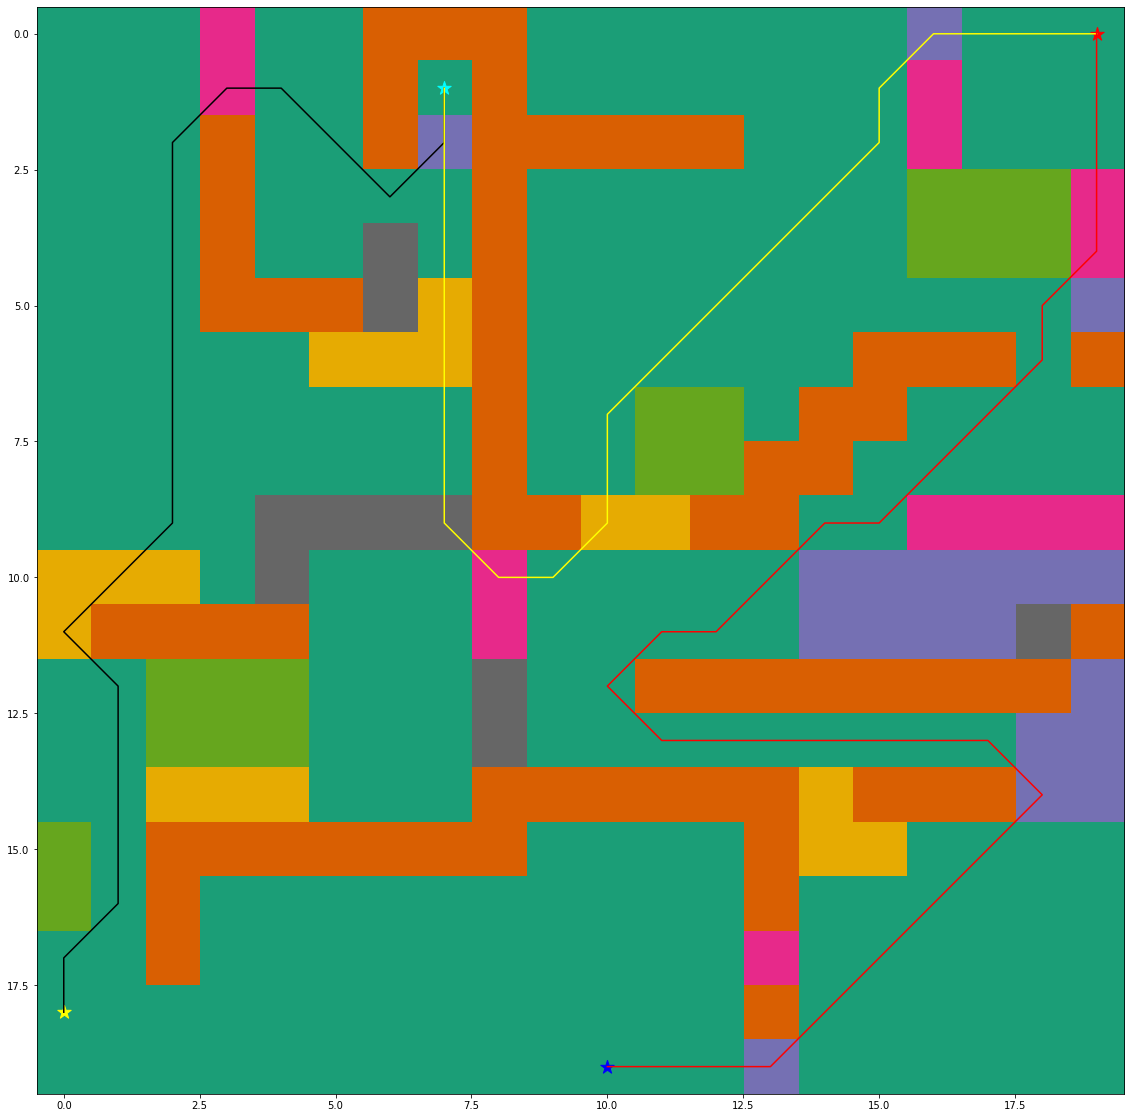

In [11]:
#Original code taken from (Andrew Jones, 2018) at https://www.analytics-link.com/single-post/2018/09/14/Applying-the-A-Path-Finding-Algorithm-in-Python-Part-1-2D-square-grid
#Prototype uses A* search algorithm for pathfinding
#Prototype has multigoal pathfinding, different terrain with various costs to pathfind through and pathfinding to another goal after reaching the previous goal
##############################################################################
# import packages
##############################################################################
import numpy as np
import heapq
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

##############################################################################
# Grid plot, used to create a map
# 0 represents empty space
# 1 represents impassable walls
# Other numbers represent terrain with different weights 
# A* has to consider when choosing a path
##############################################################################
#Grid has been modified by me to better showcase different terrain and possible paths
grid = np.array([
    [0, 0, 0, 3, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0],
    [0, 0, 0, 3, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 1, 2, 1, 1, 1, 1, 1, 0, 0, 0, 3, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 3],
    [0, 0, 0, 1, 0, 0, 7, 0, 1, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 3],
    [0, 0, 0, 1, 1, 1, 7, 5, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2],
    [0, 0, 0, 0, 0, 5, 5, 5, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 4, 4, 0, 1, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 4, 4, 1, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 7, 7, 7, 7, 1, 1, 5, 5, 1, 1, 0, 0, 3, 3, 3, 3],
    [5, 5, 5, 0, 7, 0, 0, 0, 3, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2],
    [5, 1, 1, 1, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0, 2, 2, 2, 2, 7, 1],
    [0, 0, 4, 4, 4, 0, 0, 0, 7, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2],
    [0, 0, 4, 4, 4, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2],
    [0, 0, 5, 5, 5, 0, 0, 0, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 2, 2],
    [4, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 5, 5, 0, 0, 0, 0],
    [4, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0]])

#Positions are set based on grid coordinates
#Positions can be changed to any coordinate that does not have a value of '1'
#Start point (Position changed by me)
start = (18,0)
#Goal (Position changed by me)
goal = (0,19)
#Extra goal (Created by me)
next_goal = (19,10)
#An alternate first goal (Created by me)
alt_goal = (1, 7)

##############################################################################
# heuristic function for path scoring
##############################################################################
def heuristic(a, b): #Straight line distance algorithm(Manhattan walk distance not used as it is less efficient for diagonal movement)
    return np.sqrt((b[0] - a[0]) ** 2 + (b[1] - a[1]) ** 2)

##############################################################################
# path finding function (A* pathfinding algorithm)
##############################################################################
def astar(array, start, end): #Passing both the start and endpoint establishes both as waypoints for more optimized pathfinding

    #Search in 8 directions from current position
    neighbors = [(0,1),(0,-1),(1,0),(-1,0),(1,1),(1,-1),(-1,1),(-1,-1)]

    close_set = set() #Closed list for checked nodes
    came_from = {} #List of nodes in current path
    gscore = {start:0} #List of g score of current path
    fscore = {start:heuristic(start, end)} #List of f score of current path
    oheap = [] #Open list for possible nodes to path to
    data = [] #Determined path

    heapq.heappush(oheap, (fscore[start], start)) #Start position alongside fscore is pushed onto the heap
    
    #Actual pathfinding begins
    while oheap:

        current = heapq.heappop(oheap)[1] #Get the lowest fscore neighbors

        #Goal found
        if current == end:
            while current in came_from: #Gets the nodes in the path
                data.append(current)
                current = came_from[current]
            return data, fscore #Returns list of nodes and fscores in route

        close_set.add(current) #Adds current position to closed list

        #Checks the neighbors
        for i, j in neighbors:
            neighbor = current[0] + i, current[1] + j

            tentative_g_score = gscore[current] + heuristic(current, neighbor)#Temporary Gscore assigned

            #Ensures pathfinding will not exceed map bounds
            if 0 <= neighbor[0] < array.shape[0]:
                if 0 <= neighbor[1] < array.shape[1]:                
                    if array[neighbor[0]][neighbor[1]] == 1: #Ensures pathfinding doesn't include walls(orange terrain neighbor)
                        continue
                else:
                    # Neighbor exceeds height of the map
                    continue
            else:
                # Neighbor exceeds width of the map
                continue

            #Checks if the neighbour is in the closed list or 
            if neighbor in close_set and tentative_g_score >= gscore.get(neighbor, 0): 
                continue
                
            #Sets weight for different terrain(created by me)
            if array[neighbor[0]][neighbor[1]] == 5: #Light brown terrain neighbor
                tentative_g_score += 5
            elif array[neighbor[0]][neighbor[1]] == 3: #Pink terrain neighbor
                tentative_g_score += 3
            elif array[neighbor[0]][neighbor[1]] == 4: #Green terrain neighbor
                tentative_g_score += 4
            elif array[neighbor[0]][neighbor[1]] == 7: #Gray terrain neighbor
                tentative_g_score += 7
            elif array[neighbor[0]][neighbor[1]] == 2: #Purple terrain neighbor
                tentative_g_score += 2

            #Checks if neighbour is selectable
            if  tentative_g_score < gscore.get(neighbor, 0) or neighbor not in [i[1]for i in oheap]:
                came_from[neighbor] = current
                gscore[neighbor] = tentative_g_score #Gscore is confirmed and no longer tentative
                fscore[neighbor] = tentative_g_score + heuristic(neighbor, end) #F = G + H
                heapq.heappush(oheap, (fscore[neighbor], neighbor))

    return False

#Pathfinding to first goal
route, froute = astar(grid, start, goal)#Calls the a* function
route = route + [start]#Add coordinates of the pathfinding start to the list
route = route[::-1]#Reverses the list as list originally shows route from end to start, not vice versa
print("To goal")
print(route)

#Pathfinding to alternate first goal(Created by me)
altroute, faroute = astar(grid, start, alt_goal)
altroute = altroute + [start]
altroute = altroute[::-1]
print("To alternate goal")
print(altroute)

#Checks if alt_goal or goal is closer using their fscores(Created by me)
if sum(faroute.values()) < sum(froute.values()): #alt_goal is closer
    print("Fvalues")
    print(sum(faroute.values()))
    print(sum(froute.values()))
    
    #Route will head to goal then to next_goal
    route = altroute #Change route 
    print("Altroute chosen")
    
    #Pathfinding to second goal
    nextroute, fnroute = astar(grid, alt_goal, goal)
    nextroute = nextroute + [alt_goal]
    nextroute = nextroute[::-1]
    print("From altgoal to goal")
    print(nextroute)
    
    #Pathfinding to final goal
    lastroute, flroute = astar(grid, goal, next_goal)
    lastroute = lastroute + [goal]
    lastroute = lastroute[::-1]
    print("From goal to nextgoal")
    print(lastroute)
    
else: #The goal is closer
    print("Fvalues")
    print(sum(faroute.values()))
    print(sum(froute.values()))
    
    #Route will head to next_goal then to alt_goal
    print("Route chosen")
    
    #Pathfinding to second goal
    nextroute, fnroute = astar(grid, goal, next_goal)
    nextroute = nextroute + [goal]
    nextroute = nextroute[::-1]
    print("From goal to nextgoal")
    print(nextroute)
    
    #Pathfinding to final goal
    lastroute, flroute = astar(grid, next_goal, alt_goal)
    lastroute = lastroute + [next_goal]
    lastroute = lastroute[::-1]
    print("From nextgoal to altgoal")
    print(lastroute)

##############################################################################
# plot the path
##############################################################################
#extract x and y coordinates from route, nextroute and lastroute(created by me)
x_coords = []
y_coords = []

nx_coords = []
ny_coords = []

lx_coords = []
ly_coords = []

#marking path from start to first goal
for i in (range(0,len(route))):
    x = route[i][0]
    y = route[i][1]
    x_coords.append(x)
    y_coords.append(y)

#marking path from first goal to second goal(Created by me)
for i in (range(0, len(nextroute))):
    x = nextroute[i][0]
    y = nextroute[i][1]
    nx_coords.append(x)
    ny_coords.append(y)
#marking path from second goal to final goal(Created by me)
for i in (range(0, len(lastroute))):
    x = lastroute[i][0]
    y = lastroute[i][1]
    lx_coords.append(x)
    ly_coords.append(y)
    
# plot map and path
fig, ax = plt.subplots(figsize=(20,20))
ax.imshow(grid, cmap=plt.cm.Dark2)
ax.scatter(start[1],start[0], marker = "*", color = "yellow", s = 200)#start
ax.scatter(goal[1],goal[0], marker = "*", color = "red", s = 200)#goal
ax.scatter(next_goal[1], next_goal[0], marker = "*", color = "blue", s = 200)#next_goal (Created by me)
ax.scatter(alt_goal[1], alt_goal[0], marker = "*", color = "cyan", s = 200)#alt_goal (Created by me)
ax.plot(y_coords,x_coords, color = "black") #First pathfinding iteration
ax.plot(ny_coords, nx_coords, color = "yellow") #Second pathfinding iteration (Created by me)
ax.plot(ly_coords, lx_coords, color = "red")#Last pathfinding iteration (Created by me)
plt.show()